# Mini Project - 2 - Group 18 - Dataset : Problem_Statement_5.csv

#### Group 18 Members:
#### 1. 2020AIML023
#### 2. 2020AIML055
#### 3. 2020AIML081

### Tasks in this assignment is to:

#### 1. Data Preprocessing

#### 2. perform K-means clustering for different values of K(2,3,4) and evaluate the quality of clustering using Silhouette score

#### 3. Consider the pre-processed text of all the sentences and find words which frequently occur together 


### Necessary imports

In [1]:
import pandas as pd
import numpy as np
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from apyori import apriori

### Data Preprocessing

In [2]:
data = pd.read_csv("problem_statement_5.csv", low_memory = False)

In [3]:
data.shape

(5315, 704)

In [4]:
data.head(3)

,text,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 694,Unnamed: 695,Unnamed: 696,Unnamed: 697,Unnamed: 698,Unnamed: 699,Unnamed: 700,Unnamed: 701,Unnamed: 702,Unnamed: 703
0,Autoimmune diseases tend to come in clusters. ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,I can completely understand why you�۪d want to...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Interesting that it only targets S1P-1/5 recep...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
np.where(data.isna().sum() < 5000)

(array([0], dtype=int64),)

#### Removal of stop words, Special Characters and any URL's if presentand finally converting all of them to lower case

In [6]:
def remove_html(string):
    soup = BeautifulSoup(string, 'lxml')
    html_free = soup.get_text()
    return html_free

In [7]:
def remove_punct(stri):
    no_punct = ''.join([c for c in stri if c not in string.punctuation])
    return no_punct

In [8]:
data['text'][1]

'I can completely understand why you�۪d want to try it. But, results reported in lectures don�۪t always stand up to the scrutiny of peer-review during publication. There so much still to do before this is convincing. I hope that it does work out, I really do. And if you�۪re aware of and happy with the risks, then that�۪s great. I just think it�۪s important to present this in a balanced way, and to understand why we don�۪t move straight from the first show of promise in an animal study to using drugs on humans. There�۪s still a lot of animal data to gather, and human data to gather before anyone can tell if it�۪s safe or effective. I can�۪t tell you how many times animal studies don�۪t follow through to humans, but it�۪s one of the major attrition points in drug development. You�۪ve been through some of the unpredictability issues with Cladribine/Gilenya, where there was an interaction that wasn�۪t predicted. But once people try it, the doctors can see patterns and work out what�۪s goin

In [9]:
data2 = pd.DataFrame()
data2['text'] = data["text"].apply(lambda x : remove_html(x)).apply(lambda x : remove_punct(x))
#data2['text'] = data2['text']
data2.head()

,text
0,Autoimmune diseases tend to come in clusters A...
1,I can completely understand why you�۪d want to...
2,Interesting that it only targets S1P15 recepto...
3,Very interesting grand merci Now I wonder wher...
4,Hi everybody My latest MRI results for Brain a...


In [10]:
data2['text'][1]

'I can completely understand why you�۪d want to try it But results reported in lectures don�۪t always stand up to the scrutiny of peerreview during publication There so much still to do before this is convincing I hope that it does work out I really do And if you�۪re aware of and happy with the risks then that�۪s great I just think it�۪s important to present this in a balanced way and to understand why we don�۪t move straight from the first show of promise in an animal study to using drugs on humans There�۪s still a lot of animal data to gather and human data to gather before anyone can tell if it�۪s safe or effective I can�۪t tell you how many times animal studies don�۪t follow through to humans but it�۪s one of the major attrition points in drug development You�۪ve been through some of the unpredictability issues with CladribineGilenya where there was an interaction that wasn�۪t predicted But once people try it the doctors can see patterns and work out what�۪s going on Clemastinemetf

In [11]:
for i in range(0,data2.shape[0]):
    data2['text'][i] = ''.join(e for e in data2['text'][i] if (e.isalnum() or e.isspace()))


In [12]:
data2['text'][1]

'I can completely understand why youd want to try it But results reported in lectures dont always stand up to the scrutiny of peerreview during publication There so much still to do before this is convincing I hope that it does work out I really do And if youre aware of and happy with the risks then thats great I just think its important to present this in a balanced way and to understand why we dont move straight from the first show of promise in an animal study to using drugs on humans Theres still a lot of animal data to gather and human data to gather before anyone can tell if its safe or effective I cant tell you how many times animal studies dont follow through to humans but its one of the major attrition points in drug development Youve been through some of the unpredictability issues with CladribineGilenya where there was an interaction that wasnt predicted But once people try it the doctors can see patterns and work out whats going on Clemastinemetformin is very exciting and g

In [13]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

In [14]:
data2['text'] = data2['text'].apply(lambda text: remove_stopwords(text))

In [15]:
data2['text'][1]

'I completely understand youd want try But results reported lectures dont always stand scrutiny peerreview publication There much still convincing I hope work I really And youre aware happy risks thats great I think important present balanced way understand dont move straight first show promise animal study using drugs humans Theres still lot animal data gather human data gather anyone tell safe effective I cant tell many times animal studies dont follow humans one major attrition points drug development Youve unpredictability issues CladribineGilenya interaction wasnt predicted But people try doctors see patterns work whats going Clemastinemetformin exciting given youve said current condition personal risk tolerance makes sense try It definitely wouldnt everyone'

In [16]:
def lower(text):
    return text.lower()

In [17]:
data2['text'] = data2['text'].apply(lambda text: lower(text))

In [18]:
data2['text'][1]

'i completely understand youd want try but results reported lectures dont always stand scrutiny peerreview publication there much still convincing i hope work i really and youre aware happy risks thats great i think important present balanced way understand dont move straight first show promise animal study using drugs humans theres still lot animal data gather human data gather anyone tell safe effective i cant tell many times animal studies dont follow humans one major attrition points drug development youve unpredictability issues cladribinegilenya interaction wasnt predicted but people try doctors see patterns work whats going clemastinemetformin exciting given youve said current condition personal risk tolerance makes sense try it definitely wouldnt everyone'

#### Convert it into TF-IDF vector and reduce them into two dimensions using PCA

In [19]:
tfIdfVectorizer=TfidfVectorizer(use_idf=True)
tfIdf = tfIdfVectorizer.fit_transform(data2['text'])

In [20]:
tfIdf_as_array = tfIdf.toarray()
tfIdf_df = pd.DataFrame(tfIdf_as_array)

##### Note: PCA from sklearn doesnot support sparse matrices. So using Truncated Single Value Decomposition instead

In [21]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)
principalComponents = svd.fit_transform(tfIdf_df)

In [22]:
data3 = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [23]:
data3.head()

,principal component 1,principal component 2
0,0.181942,-0.137113
1,0.183788,-0.060129
2,0.121632,0.020319
3,0.060832,-0.037222
4,0.148329,-0.033792


### KMeans with 2 clusters

In [24]:
expectedNumber = 2
print('K MEANS WITH NO.OF.CLUSTER :',expectedNumber ,'\n')
kmeans = KMeans(n_clusters=expectedNumber)
km=kmeans.fit(data3)
y_pred = kmeans.predict(data3)
print('CLUSTER FORMED WITH LABELS: ',y_pred,'\n')
kmeans_cluster_labels_2 = km.labels_

K MEANS WITH NO.OF.CLUSTER : 2 

CLUSTER FORMED WITH LABELS:  [0 0 0 ... 0 0 0] 



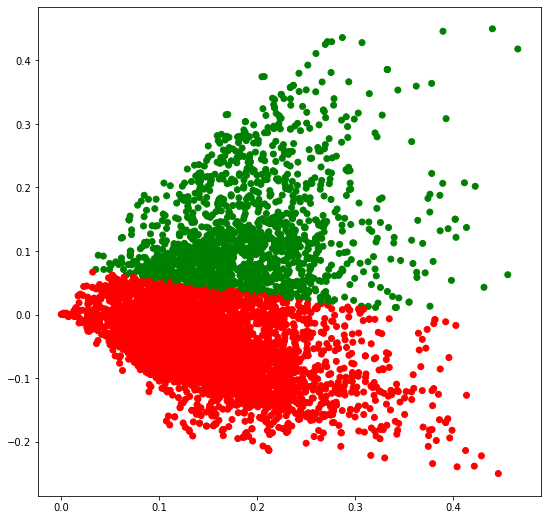

In [25]:
colours = {}
colours[0] = 'r'
colours[1] = 'g'
  
# Building the colour vector for each data point
cvec = [colours[label] for label in kmeans_cluster_labels_2]
  
# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.scatter(data3['principal component 1'], data3['principal component 2'], c = cvec)

### KMeans with 3 clusters

In [26]:
expectedNumber = 3
print('K MEANS WITH NO.OF.CLUSTER :',expectedNumber ,'\n')
kmeans = KMeans(n_clusters=expectedNumber)
km=kmeans.fit(data3)
y_pred = kmeans.predict(data3)
print('CLUSTER FORMED WITH LABELS: ',y_pred,'\n')
kmeans_cluster_labels_3 = km.labels_

K MEANS WITH NO.OF.CLUSTER : 3 

CLUSTER FORMED WITH LABELS:  [1 1 0 ... 0 1 1] 



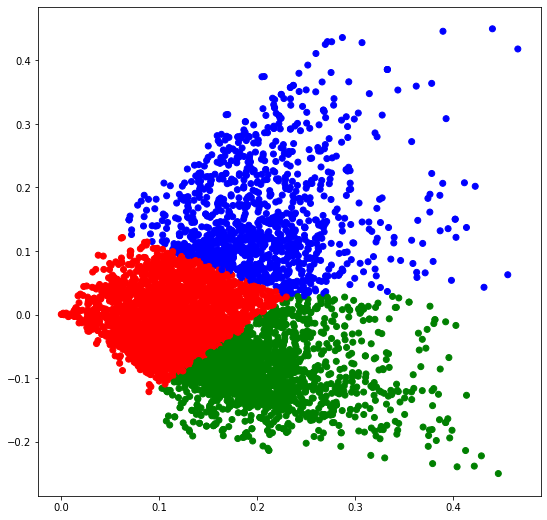

In [27]:
colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
  
# Building the colour vector for each data point
cvec = [colours[label] for label in kmeans_cluster_labels_3]
  
# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.scatter(data3['principal component 1'], data3['principal component 2'], c = cvec)

### KMeans with 4 clusters

In [28]:
expectedNumber = 4
print('K MEANS WITH NO.OF.CLUSTER :',expectedNumber ,'\n')
kmeans = KMeans(n_clusters=expectedNumber)
km=kmeans.fit(data3)
y_pred = kmeans.predict(data3)
print('CLUSTER FORMED WITH LABELS: ',y_pred,'\n')
kmeans_cluster_labels_4 = km.labels_

K MEANS WITH NO.OF.CLUSTER : 4 

CLUSTER FORMED WITH LABELS:  [0 0 2 ... 2 2 0] 



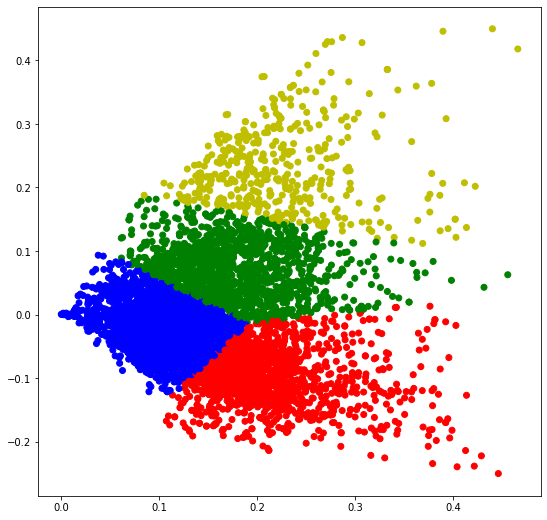

In [29]:
colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[3] = 'y'

# Building the colour vector for each data point
cvec = [colours[label] for label in kmeans_cluster_labels_4]
  
# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.scatter(data3['principal component 1'], data3['principal component 2'], c = cvec)

### Evaluating the clusters

In [30]:
print(f'Silhouette Score for kmeans clustering with   two clusters : {silhouette_score(data3, kmeans_cluster_labels_2)}')
print(f'Silhouette Score for kmeans clustering with three clusters : {silhouette_score(data3, kmeans_cluster_labels_3)}')
print(f'Silhouette Score for kmeans clustering with  four clusters : {silhouette_score(data3, kmeans_cluster_labels_4)}')



Silhouette Score for kmeans clustering with   two clusters : 0.44740454970910887
Silhouette Score for kmeans clustering with three clusters : 0.3838889165417372
Silhouette Score for kmeans clustering with  four clusters : 0.37959003556110343


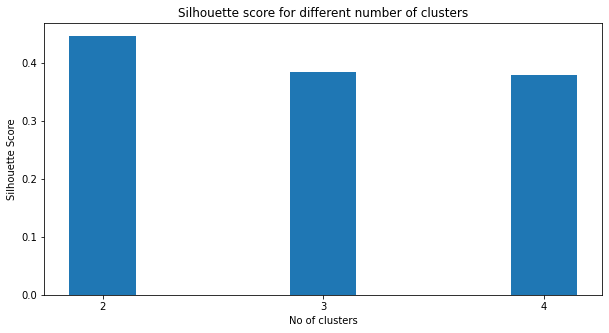

In [31]:
clusters_list= ['2','3','4']
scores_list = [round(silhouette_score(data3, kmeans_cluster_labels_2),3),
                round(silhouette_score(data3, kmeans_cluster_labels_3),3), 
                round(silhouette_score(data3, kmeans_cluster_labels_4),3)]

fig = plt.figure(figsize = (10, 5))

plt.bar(clusters_list, scores_list, width = 0.3)

plt.xlabel("No of clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette score for different number of clusters")
plt.show()


#### Kmeans with 2 clusters is the best one among all these cause it has the highest Silhouette score

### Association rules

In [32]:
records = []
for i in range(0, data2['text'].shape[0]):
    records.append(data2['text'][i].split())

In [33]:
association_rules = apriori(records, min_support=0.1, min_confidence=0.2, min_lift=2, min_length=2)
association_results = list(association_rules)

In [34]:
print("Total number of rules: ",len(association_results))

Total number of rules:  24


In [35]:
for i in range(0,len(association_results)):
    print(association_results[i])
    print('--------------')

RelationRecord(items=frozenset({'1', '2'}), support=0.10084666039510819, ordered_statistics=[OrderedStatistic(items_base=frozenset({'1'}), items_add=frozenset({'2'}), confidence=0.6552567237163814, lift=2.8523255418120943), OrderedStatistic(items_base=frozenset({'2'}), items_add=frozenset({'1'}), confidence=0.438984438984439, lift=2.8523255418120943)])
--------------
RelationRecord(items=frozenset({'3', '2'}), support=0.10235183443085606, ordered_statistics=[OrderedStatistic(items_base=frozenset({'2'}), items_add=frozenset({'3'}), confidence=0.4455364455364455, lift=2.246704182188053), OrderedStatistic(items_base=frozenset({'3'}), items_add=frozenset({'2'}), confidence=0.5161290322580645, lift=2.246704182188053)])
--------------
RelationRecord(items=frozenset({'cancer', 'lung'}), support=0.13471307619943557, ordered_statistics=[OrderedStatistic(items_base=frozenset({'cancer'}), items_add=frozenset({'lung'}), confidence=0.6226086956521739, lift=4.025748439648789), OrderedStatistic(items

In [36]:
print(association_results[6])
print('\n')
print("=====================================")
print('\n')
item = association_results[6]
pair = item[0] 
items = [x for x in pair]
print("Rule: " + items[0] + " -> " + items[1])
print("Support: " + str(item[1]))
print("Confidence: " + str(item[2][0][2]))
print("Lift: " + str(item[2][0][3]))


RelationRecord(items=frozenset({'disease', 'patients'}), support=0.11890874882408278, ordered_statistics=[OrderedStatistic(items_base=frozenset({'disease'}), items_add=frozenset({'patients'}), confidence=0.5205930807248764, lift=2.3115724511718616), OrderedStatistic(items_base=frozenset({'patients'}), items_add=frozenset({'disease'}), confidence=0.5279866332497911, lift=2.3115724511718616)])




Rule: disease -> patients
Support: 0.11890874882408278
Confidence: 0.5205930807248764
Lift: 2.3115724511718616


##### This rule says that patients and disease are the one of the most common occuring words with length 2 with a support of ~0.12, Confidence of 0.52 and with a lift of 2.3

#### Plotting Line Graph

In [37]:
association_rules_10 = apriori(records, min_support=0.1,min_lift = 2, min_length=2)
association_results_10 = list(association_rules_10)
print("Total no of rules: ", len(association_results_10))

Confidence_10 =[]
for item in association_results_10:
    pair = item[0] 
    items = [x for x in pair]
    Confidence_10.append(item[2][0][2])
Confidence_10 = [element * 100 for element in Confidence_10]

index_10 = []
for i in range(1,len(Confidence_10)+1):
    index_10.append(i)

Total no of rules:  24


In [38]:
association_rules_20 = apriori(records, min_support=0.2, min_length=2)
association_results_20 = list(association_rules_20)
print("Total no of rules : ",len(association_results_20))

Confidence_20 =[]
for item in association_results_20:
    pair = item[0] 
    items = [x for x in pair]
    Confidence_20.append(item[2][0][2])
Confidence_20 = [element * 100 for element in Confidence_20]

index_20 = []
for i in range(1,len(Confidence_20)+1):
    index_20.append(i)

Total no of rules :  42


In [39]:
association_rules_50 = apriori(records, min_support=0.5, min_length=2)
association_results_50 = list(association_rules_50)
print("Total no of rules : ",len(association_results_50))

Confidence_50 =[]
for item in association_results_50:
    pair = item[0] 
    items = [x for x in pair]
    Confidence_50.append(item[2][0][2])
Confidence_50 = [element * 100 for element in Confidence_50]

index_50 = []
for i in range(1,len(Confidence_50)+1):
    index_50.append(i)

Total no of rules :  1


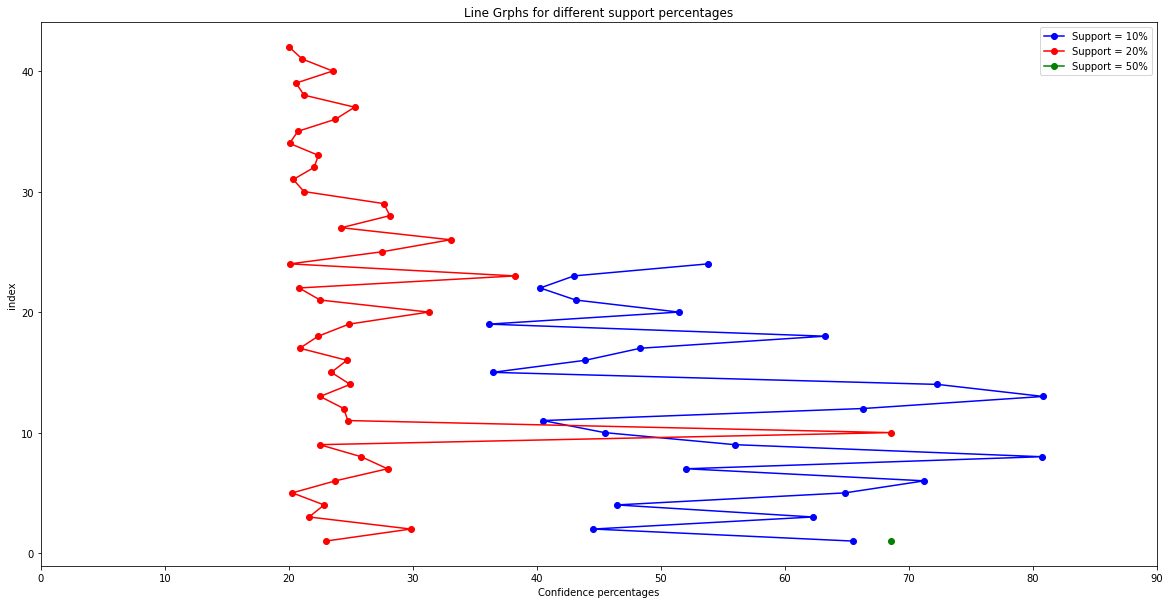

In [40]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(Confidence_10,index_10,color='b', marker = 'o')
plt.plot(Confidence_20,index_20,color='r', marker = 'o')
plt.plot(Confidence_50,index_50,color='g', marker = 'o')
plt.xlabel("Confidence percentages")  # add X-axis label
plt.ylabel("index")  # add Y-axis label
plt.xticks(np.arange(0,100, step=10))
plt.title("Line Grphs for different support percentages")  # add title
plt.legend(["Support = 10%","Support = 20%", "Support = 50%"])
plt.show()

#### Note: Theres just one rule with min_support = 50  thats the reason for one point there